In [ ]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
import numpy as np

In [ ]:
from keras.layers import Embedding, LSTM, Input, concatenate
from keras.models import Model

def define_text_encoder(vocab_size, max_length, embedding_dim=100):
    input_text = Input(shape=(max_length,))
    x = Embedding(vocab_size, embedding_dim, input_length=max_length)(input_text)
    x = LSTM(256)(x)
    return Model(inputs=input_text, outputs=x)

vocab_size = 5000  # Example vocabulary size
max_length = 50    # Example maximum length of text input
text_encoder = define_text_encoder(vocab_size, max_length)
text_encoder.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_77 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 50, 100)           500000    
                                                                 
 lstm_4 (LSTM)               (None, 256)               365568    
                                                                 
Total params: 865568 (3.30 MB)
Trainable params: 865568 (3.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(trainX, trainy), (testx, testy)= load_data()

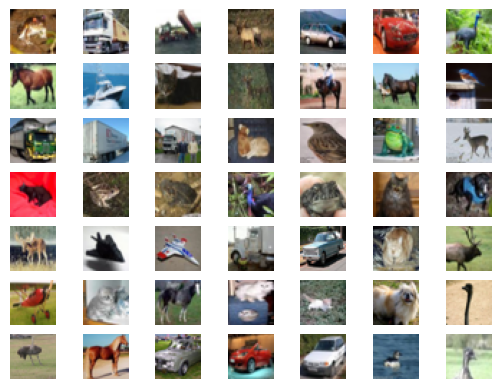

In [ ]:
for i in range(49):
  pyplot.subplot(7, 7, i+1)
  pyplot.axis('off')
  pyplot.imshow(trainX[i])
pyplot.show()

In [ ]:
pip install keras tensorflow

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils import plot_model


**DISCRIMINATOR**

In [ ]:
def define_discriminator(image_shape=(128, 128, 3), text_embedding_dim=256):
    img_input = Input(shape=image_shape)
    text_input = Input(shape=(text_embedding_dim,))

    # Downsample image
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(img_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)

    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)

    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)

    x = Conv2D(512, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)

    # Flatten the feature maps
    x = Flatten()(x)

    # Concatenate image features and text embeddings
    x = concatenate([x, text_input])

    # Fully connected layer
    x = Dense(1024)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)

    # Output layer
    output = Dense(1, activation='sigmoid')(x)

    model = Model([img_input, text_input], output)

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

    return model

d_model= define_discriminator()
d_model.summary()



Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_78 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_58 (Conv2D)          (None, 64, 64, 64)           1792      ['input_78[0][0]']            
                                                                                                  
 leaky_re_lu_160 (LeakyReLU  (None, 64, 64, 64)           0         ['conv2d_58[0][0]']           
 )                                                                                                
                                                                                                  
 dropout_35 (Dropout)        (None, 64, 64, 64)           0         ['leaky_re_lu_160[0][0]

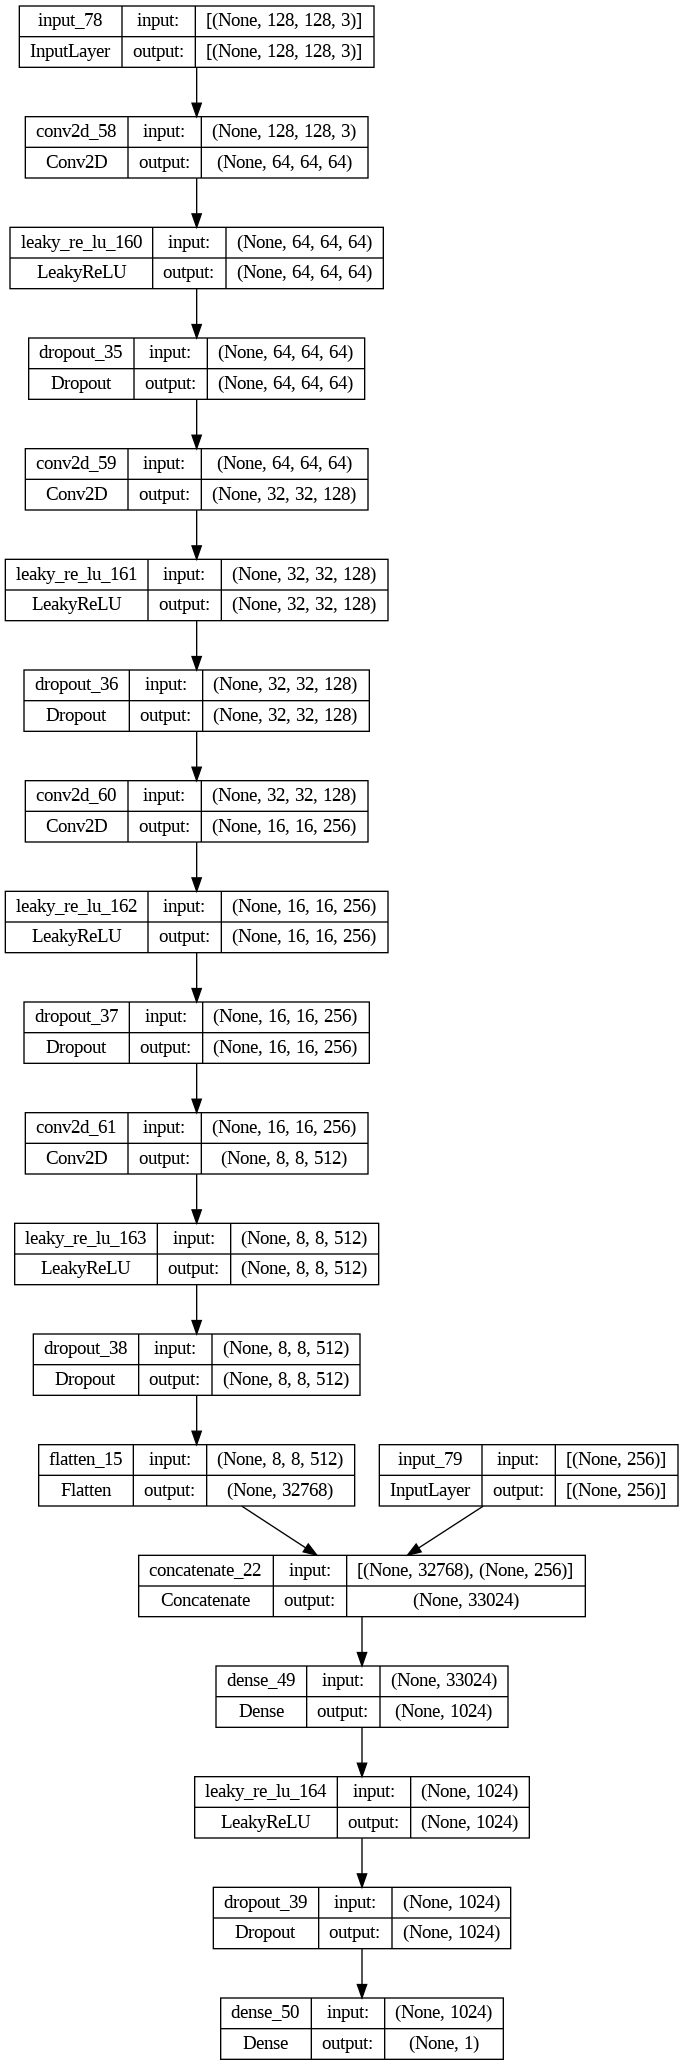

In [ ]:

plot_model(d_model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def load_real_samples():
  (trainX, _), (_, _) = load_data()
  X = trainX.astype('float32')
  X = (X - 127.5) / 127.5
  return X

In [ ]:
X=load_real_samples()
X.shape

(50000, 32, 32, 3)

In [ ]:
X[0]

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [ ]:
def generate_real_samples(dataset, n_samples):
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  X = dataset[ix]
  y = np.ones((n_samples, 1))
  return X, y


In [ ]:
X_r, y_r= generate_real_samples(X, 50)

In [ ]:
X_r.shape

(50, 32, 32, 3)

In [ ]:
y_r.shape

(50, 1)

In [ ]:
y_r[0]

array([1.])

In [ ]:
def generate_fake_samples(n_samples):
  X = np.random.rand(32*32*3*n_samples)
  X=-1+X*2
  X = X.reshape((n_samples, 32, 32, 3))
  y = np.zeros((n_samples, 1))
  return X, y

In [ ]:
X_f, y_f= generate_fake_samples(50)
print(X_f.shape)
print(y_f.shape)

(50, 32, 32, 3)
(50, 1)


In [ ]:
y_f[0]

array([0.])

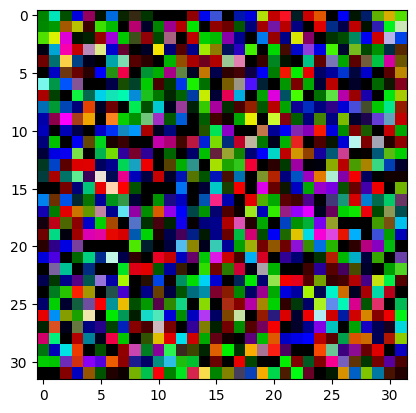

In [ ]:
#to see how noise actually looks
pyplot.imshow(X_f[0])

this is how noise looks like!


**GENERATOR**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU

def define_generator(latent_dim, text_embedding_dim):
    latent_input = Input(shape=(latent_dim,))
    text_input = Input(shape=(text_embedding_dim,))

    # Merge the latent and text inputs
    merged_input = concatenate([latent_input, text_input])

    # Foundation for 4x4 image
    n_nodes = 128 * 8 * 8
    x=Dense(n_nodes)(merged_input)
    x=LeakyReLU(alpha=0.2)(x)
    x=Reshape((8,8,128))(x)

    # Upsample to 8x8
    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Upsample to 16*16
    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Upsample to 32*32
    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Output layer
    output = Conv2DTranspose(3, (7, 7), strides=(2, 2), padding='same', activation='tanh')(x)

    model = Model([latent_input, text_input], output)

    return model



In [214]:
latent_dim = 100
text_embedding_dim = 256
g_model = define_generator(latent_dim, text_embedding_dim)
g_model.summary()

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_94 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 input_95 (InputLayer)       [(None, 256)]                0         []                            
                                                                                                  
 concatenate_28 (Concatenat  (None, 356)                  0         ['input_94[0][0]',            
 e)                                                                  'input_95[0][0]']            
                                                                                                  
 dense_58 (Dense)            (None, 8192)                 2924544   ['concatenate_28[0][0]'

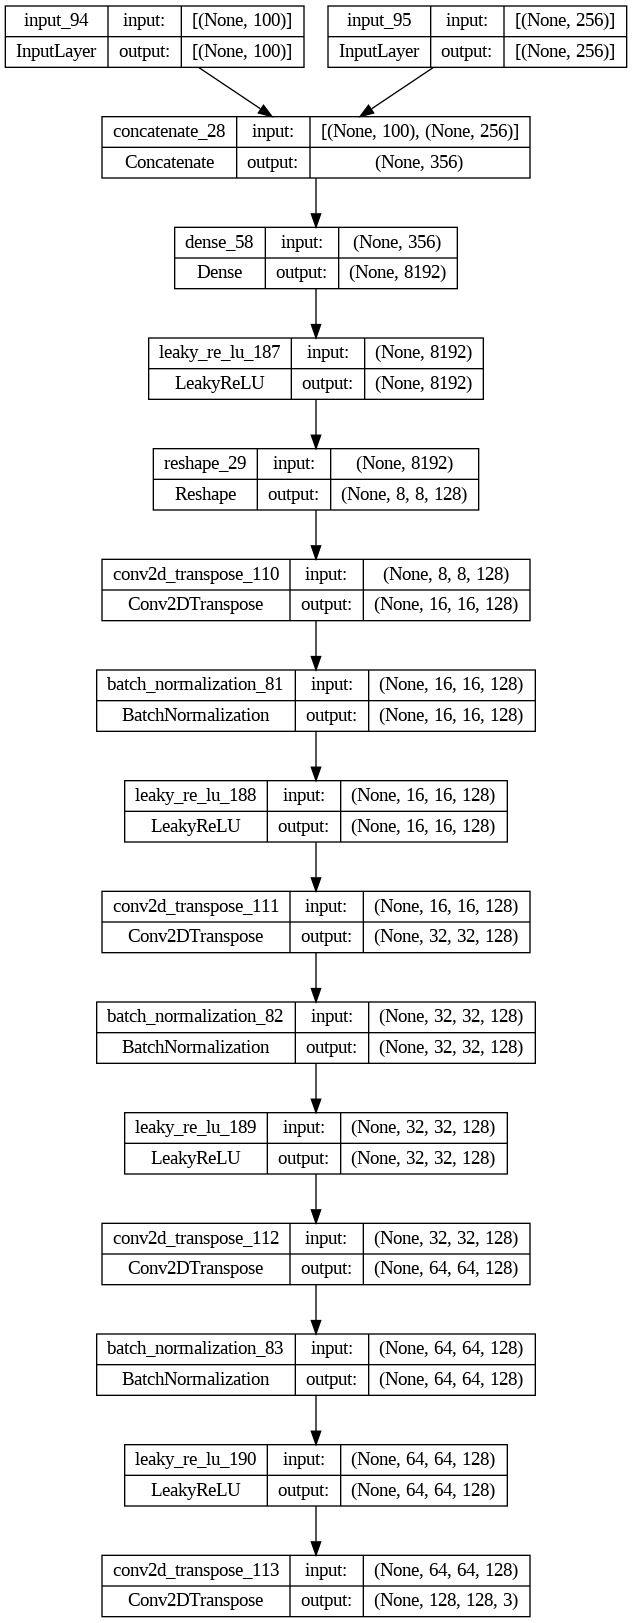

In [215]:
plot_model(g_model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [ ]:
x_input=generate_latent_points(latent_dim, 64)
x_input.shape

(64, 100)

In [ ]:
def generate_fake_samples (g_model, latent_dim, text_embedding_dim,n_samples):
  x_input = generate_latent_points(latent_dim,n_samples)
  dummy_text_embedding = np.zeros((n_samples, text_embedding_dim))
  predictions = g_model.predict([x_input, dummy_text_embedding])
  X = predictions[0]
  y = np.zeros((n_samples, 1))
  return X, y



2/2 [==============================] - 3s 752ms/step


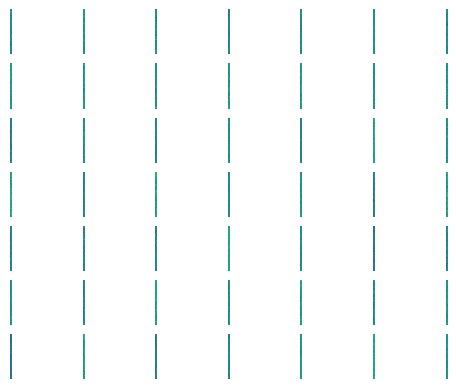

In [ ]:
latent_dim=100
text_embedding_dim=256
g_model=define_generator(latent_dim, text_embedding_dim)
n_samples=49
X, _ = generate_fake_samples(g_model, latent_dim,text_embedding_dim, n_samples)
X=(X+1)/2.0
for i in range(n_samples):
  pyplot.subplot(7, 7, i+1)
  pyplot.axis('off')
  pyplot.imshow(X[i])
pyplot.show()

In [ ]:
def define_gan(g_model, d_model, text_encoder):
  #freeze the discriminator so that it pressurizes the generator to give images(labelled as 1) that can be told real by discriminator
  # we will train discriminator alag se
  d_model.trainable = False
  latent_input = Input(shape=(latent_dim,))
  text_input = Input(shape=(max_length,))

  text_embedding = text_encoder(text_input)

    # Generate the image
  img = g_model([latent_input, text_embedding])
  print(img.shape)
  print(d_model.input_shape)

    # Classify the image
  valid = d_model([img, text_embedding])

  model = Model([latent_input, text_input], valid)
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
  return model

gan = define_gan(g_model, d_model, text_encoder)
gan.summary()

(None, 128, 128, 3)
[(None, 128, 128, 3), (None, 256)]
Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_87 (InputLayer)       [(None, 50)]                 0         []                            
                                                                                                  
 input_86 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 model_26 (Functional)       (None, 256)                  865568    ['input_87[0][0]']            
                                                                                                  
 model_30 (Functional)       (None, 128, 128, 3)          3731715   ['input_86[0][0]',            
                                    

In [194]:
latent_dim=100
d_model=define_discriminator()
g_model=define_generator(latent_dim, text_embedding_dim)
gan_model=define_gan(g_model, d_model, text_encoder)
gan_model.summary()

(None, 128, 128, 3)
[(None, 128, 128, 3), (None, 256)]
Model: "model_34"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_93 (InputLayer)       [(None, 50)]                 0         []                            
                                                                                                  
 input_92 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 model_26 (Functional)       (None, 256)                  865568    ['input_93[0][0]']            
                                                                                                  
 model_33 (Functional)       (None, 128, 128, 3)          3731715   ['input_92[0][0]',            
                                    

In [229]:
def train(g_model, d_model, gan_model,text_encoder, dataset, latent_dim, text_embedding_dim, n_epochs=200, n_batch=128):
  #for no of batches in 1 epoch we need to divide total no of rows by 128
  bat_per_epo = int(dataset.shape[0] / n_batch)
  #for half real half fake
  half_batch = int(n_batch / 2)
  for i in range(n_epochs):
    for j in range(bat_per_epo):
      X_real, y_real = generate_real_samples(dataset, half_batch)

      #updating discriminator model weights also side by side
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)


      X_fake, y_fake = generate_fake_samples(g_model, latent_dim,text_embedding_dim, half_batch)
      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)


      X_gan = generate_latent_points(latent_dim, n_batch)
      #we are labelling the generated images(fake ones) intentionally as 1
      y_gan = np.ones((n_batch, 1))
      g_loss = gan_model.train_on_batch(X_gan, y_gan)

      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
      if (i+1)%10==0:
        summarize_performance(i, g_model,d_model, dataset, latent_dim, text_embedding_dim)

In [228]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim,text_embedding_dim, n_samples=150):
  X_real, y_real = generate_real_samples(dataset, n_samples)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  X_fake, y_fake = generate_fake_samples(g_model, latent_dim, text_embedding_dim, n_samples)
  _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
  save_plot(X_fake, epoch)
  file_name = 'generator_model_%03d.h5' % (epoch+1)
  g_model.save(file_name)



In [227]:
def save_plot(examples, epoch, n=7):
  examples=(examples+1)/2.0
  for i in range(n * n):
    pyplot.subplot(n, n, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(examples[i])
  filename = 'generated_plot_%03d.png' % (epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [230]:
train(g_model, d_model, gan_model, text_encoder, dataset, latent_dim,text_embedding_dim, n_epochs=200, n_batch=128)

In [219]:
import torch
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer() # Initialize tokenizer

In [223]:
def generate_image_from_text(text_description, text_encoder, generator, latent_dim, max_length, device):

    tokens = tokenizer.texts_to_sequences([text_description])
    padded_tokens = pad_sequences(tokens, maxlen=max_length, padding='post')
    text_embedding = text_encoder.predict(padded_tokens)

    text_embedding = torch.tensor(text_embedding, dtype=torch.float32, device=device)

    noise = torch.randn(1, latent_dim, device=device)

    noise_tf = tf.convert_to_tensor(noise.numpy())
    text_embedding_tf = tf.convert_to_tensor(text_embedding.numpy())

    generated_image_tf = generator([noise_tf, text_embedding_tf], training=False).numpy()


    generated_image_np = generated_image_tf.squeeze(0)

    return generated_image_np


text_description = "black cat with a dog"
latent_dim = 100
max_length = 50
device = 'cuda' if torch.cuda.is_available() else 'cpu'

text_encoder = define_text_encoder(vocab_size, max_length)
g_model = define_generator(latent_dim, text_embedding_dim)
generated_image = generate_image_from_text(text_description, text_encoder, g_model, latent_dim, max_length, device)


1/1 [==============================] - 0s 477ms/step
